In [1]:
import matplotlib.pyplot as plt
import numpy as np


from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier

from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import learning_curve

In [2]:
x, y = fetch_openml(name="Fashion-MNIST", as_frame=False, return_X_y=True)
    # 改变数据类型
y = y.astype(int)
    # 训练，测试数据分类
x_te, x_temp, y_te, y_temp = train_test_split(x, y, test_size=0.8, shuffle=True)
x_tr, x_va, y_tr, y_va = train_test_split(x_temp, y_temp, test_size=0.25, shuffle=True)

# print(x_val.shape,x_tr.shape,x_te.shape)

# 数据规范化
scaler = StandardScaler()
scaler.fit(x_tr)
trans_x_va = scaler.transform(x_va)
trans_x_tr = scaler.transform(x_tr)
trans_x_te = scaler.transform(x_te)

In [3]:
fnn = MLPClassifier(activation = "relu",learning_rate = "invscaling",hidden_layer_sizes = (400, 200,100,50,))
lm = LogisticRegression(solver = 'newton-cg',C=10, max_iter=10, penalty= 'l2')
rf = RandomForestClassifier(n_estimators = 100, min_samples_split = 10, min_samples_leaf = 2, max_features = "log2", max_depth = 100, criterion = "log_loss")
knn = KNeighborsClassifier(n_neighbors=10) 

clf_list = [fnn,lm,rf,knn]

In [4]:
from datetime import datetime 
import random

In [5]:
a = datetime.now() 

In [6]:
b = datetime.now() 

In [7]:
print((b-a).microseconds)
(b-a).seconds

3365


0

In [8]:
N = len(clf_list)
train_size = [500,1500,3000,5000,10000,20000,30000,42000]
train_time = [[] for n in range(N)]
pre_time = [[] for n in range(N)]

In [9]:
for size in train_size:
    print(size)
    random_index = random.randint(0,trans_x_tr.shape[0] - size)
    for index in range(len(clf_list)):
        #fit the model
        
        #train time
        a=datetime.now()
        clf_list[index].fit(trans_x_tr[random_index:random_index+size],y_tr[random_index:random_index+size])
        b=datetime.now() 
        train_time[index].append((b-a).seconds)
        
        #prediction time
        c=datetime.now()
        clf_list[index].predict(trans_x_te)
        d=datetime.now() 
        pre_time[index].append((d-c).microseconds/y_te.shape[0])

500


/Users/yizhihensaodezhu/.local/lib/python3.9/site-packages/sklearn/utils/optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(


1500


/Users/yizhihensaodezhu/.local/lib/python3.9/site-packages/sklearn/utils/optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(


3000


/Users/yizhihensaodezhu/.local/lib/python3.9/site-packages/sklearn/utils/optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(


5000


/Users/yizhihensaodezhu/.local/lib/python3.9/site-packages/sklearn/utils/optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(


10000


/Users/yizhihensaodezhu/.local/lib/python3.9/site-packages/sklearn/utils/optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(


20000


/Users/yizhihensaodezhu/.local/lib/python3.9/site-packages/sklearn/utils/optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(


30000


/Users/yizhihensaodezhu/.local/lib/python3.9/site-packages/sklearn/utils/optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(


42000


/Users/yizhihensaodezhu/.local/lib/python3.9/site-packages/sklearn/utils/optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(


In [10]:
for i in train_time:
    print(i)
    print(len(i))

[2, 8, 16, 30, 54, 135, 149, 284]
8
[0, 0, 0, 1, 2, 6, 8, 5]
8
[0, 0, 0, 1, 3, 6, 10, 14]
8
[0, 0, 0, 0, 0, 0, 0, 0]
8


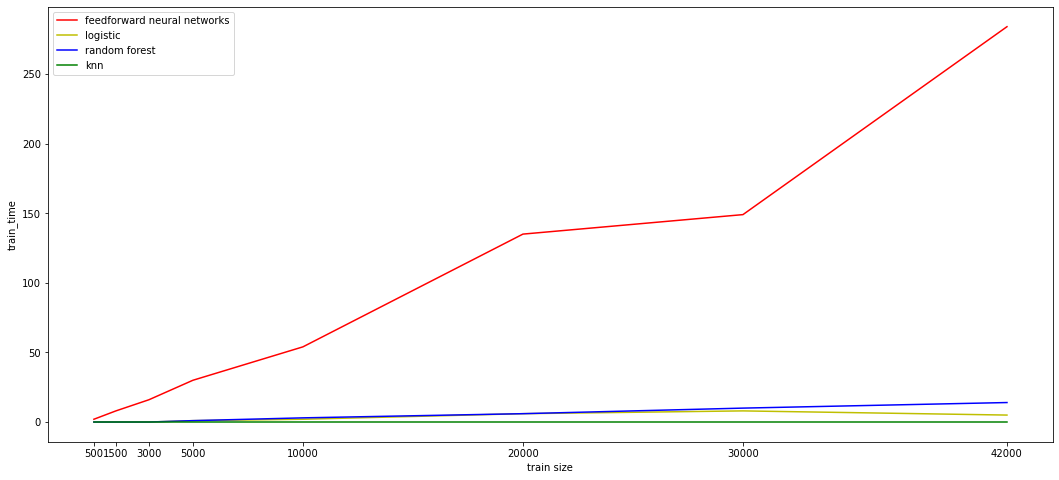

In [13]:
fig,axes = plt.subplots(figsize = (18,8))
axes.set_xlabel("train size")
axes.set_ylabel("train_time")
axes.plot(train_size,train_time[0],"r-",label = "feedforward neural networks")
axes.plot(train_size,train_time[1],"y-",label = "logistic")
axes.plot(train_size,train_time[2],"b-",label = "random forest")
axes.plot(train_size,train_time[3],"g-",label = "knn")
axes.set_xticks(train_size)
axes.legend()

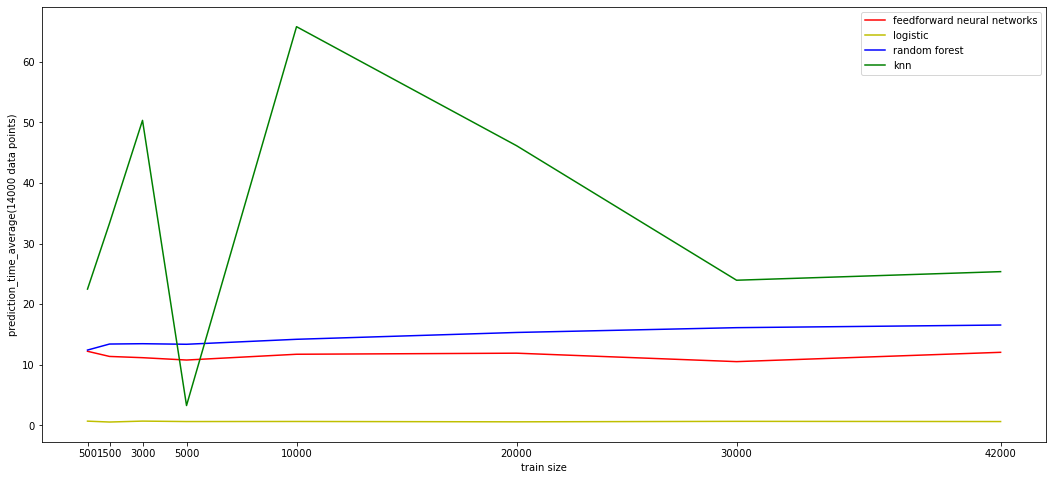

In [12]:
fig,axes = plt.subplots(figsize = (18,8))
axes.set_xlabel("train size")
axes.set_ylabel("prediction_time_average(14000 data points)")
axes.plot(train_size,pre_time[0],"r-",label = "feedforward neural networks")
axes.plot(train_size,pre_time[1],"y-",label = "logistic")
axes.plot(train_size,pre_time[2],"b-",label = "random forest")
axes.plot(train_size,pre_time[3],"g-",label = "knn")
axes.set_xticks(train_size)
axes.legend()

([500, 1500, 3000, 5000, 10000, 20000, 30000, 42000],
 [12.21792857142857,
  11.36742857142857,
  11.1615,
  10.774285714285714,
  11.728071428571429,
  11.904357142857142,
  10.511,
  12.04807142857143])